In [16]:
# Task 2 - Dictionary Operations

student = {
    "name": "Abdullah Shah",
    "age": 21,
    "roll_number": "SP23-BCS-101",
    "grade": "A"
}

# 1. Print keys and values
print(student.items())

# 2. Update grade
student["grade"] = "B+"

# 3. Add email
student["email"] = "sabdullah15742@gmail.com"

# 4. Delete roll_number
del student["roll_number"]

print("Updated Student Info:", student)

dict_items([('name', 'Abdullah Shah'), ('age', 21), ('roll_number', 'SP23-BCS-101'), ('grade', 'A')])
Updated Student Info: {'name': 'Abdullah Shah', 'age': 21, 'grade': 'B+', 'email': 'sabdullah15742@gmail.com'}


In [17]:
from collections import deque

# BFS and DFS on a Graph
graph = {
    'A': ['B', 'C'],
    'B': ['D', 'E'],
    'C': ['F'],
    'D': [],
    'E': ['F'],
    'F': []
}

def bfs(start):
    visited = []
    queue = deque([start])
    while queue:
        node = queue.popleft()
        if node not in visited:
            visited.append(node)
            queue.extend(graph[node])
    return visited

print("BFS Traversal:", bfs('A'))

def dfs(start, visited=None):
    if visited is None:
        visited = []
    visited.append(start)
    for neighbor in graph[start]:
        if neighbor not in visited:
            dfs(neighbor, visited)
    return visited

print("DFS Traversal:", dfs('A'))

BFS Traversal: ['A', 'B', 'C', 'D', 'E', 'F']
DFS Traversal: ['A', 'B', 'D', 'E', 'F', 'C']


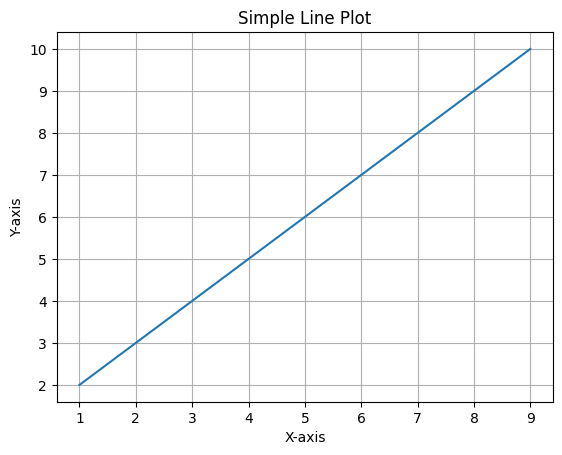

In [18]:
# Task 3 - Line Plot using Matplotlib
import matplotlib.pyplot as plt

X = [2, 4, 6, 8, 10]
Y = [1, 3, 5, 7, 9]

plt.plot(Y, X)
plt.title("Simple Line Plot")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.grid(True)
plt.show()

In [19]:
# Task 4 - Water Jug Problem (BFS & DFS)
from collections import deque
import time

def water_jug_bfs(jug1, jug2, target):
    start_time = time.time()
    visited = set()
    queue = deque([(0, 0)])
    while queue:
        a, b = queue.popleft()
        if (a, b) in visited:
            continue
        visited.add((a, b))
        if a == target or b == target:
            print("Solution Found:", (a, b))
            print("Steps Taken:", len(visited))
            print("Time Taken:", time.time() - start_time)
            return
        queue.extend([
            (jug1, b), (a, jug2), (0, b), (a, 0),
            (a - min(a, jug2 - b), b + min(a, jug2 - b)),
            (a + min(b, jug1 - a), b - min(b, jug1 - a))
        ])
    print("No solution found")

water_jug_bfs(4, 3, 2)

visited = set()

def water_jug_dfs(a, b, jug1, jug2, target):
    # Base condition
    if (a, b) in visited:
        return False
    print(f"Visited state: ({a}, {b})")
    visited.add((a, b))

    # If target is reached
    if a == target or b == target:
        print("Solution Found:", (a, b))
        return True

    # Explore all possible moves (like BFS but recursively)
    return (
        water_jug_dfs(jug1, b, jug1, jug2, target) or # Fill Jug1
        water_jug_dfs(a, jug2, jug1, jug2, target) or # Fill Jug2
        water_jug_dfs(0, b, jug1, jug2, target) or # Empty Jug1
        water_jug_dfs(a, 0, jug1, jug2, target) or # Empty Jug2
        water_jug_dfs(a - min(a, jug2 - b), b + min(a, jug2 - b), jug1, jug2, target) or # Pour Jug1 -> Jug2
        water_jug_dfs(a + min(b, jug1 - a), b - min(b, jug1 - a), jug1, jug2, target) # Pour Jug2 -> Jug1
    )

# Example usage:
water_jug_dfs(0, 0, 4, 3, 2)

Solution Found: (4, 2)
Steps Taken: 10
Time Taken: 0.000118255615234375
Visited state: (0, 0)
Visited state: (4, 0)
Visited state: (4, 3)
Visited state: (0, 3)
Visited state: (3, 0)
Visited state: (3, 3)
Visited state: (4, 2)
Solution Found: (4, 2)


True

In [20]:
# Task 5 - Maze Pathfinding using A* Algorithm
from queue import PriorityQueue

# 0 = open path, 1 = wall
# Maze based on your image (6x6 grid)
maze = [
    [0, 1, 0, 0, 0, 0],  # Row 0: A (0,0)
    [0, 1, 0, 0, 0, 0],
    [0, 0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0, 0],
    [0, 0, 1, 0, 0, 0],
    [0, 0, 0, 0, 0, 0]   # Row 5: Y (5,5)
]

start = (0, 0)  # A
goal = (5, 5)   # Y

# Heuristic function (Manhattan distance)
def heuristic(a, b):
    return abs(a[0] - b[0]) + abs(a[1] - b[1])

def a_star(maze, start, goal):
    rows, cols = len(maze), len(maze[0])
    open_set = PriorityQueue()
    open_set.put((0, start))
    came_from = {}
    g_score = {start: 0}

    while not open_set.empty():
        current = open_set.get()[1]
        if current == goal:
            # Reconstruct path
            path = []
            while current in came_from:
                path.append(current)
                current = came_from[current]
            path.append(start)
            path.reverse()
            return path

        for dx, dy in [(0,1), (1,0), (-1,0), (0,-1)]:  # Right, Down, Up, Left
            neighbor = (current[0] + dx, current[1] + dy)
            if 0 <= neighbor[0] < rows and 0 <= neighbor[1] < cols and maze[neighbor[0]][neighbor[1]] == 0:
                temp_g = g_score[current] + 1
                if neighbor not in g_score or temp_g < g_score[neighbor]:
                    g_score[neighbor] = temp_g
                    f_score = temp_g + heuristic(neighbor, goal)
                    open_set.put((f_score, neighbor))
                    came_from[neighbor] = current
    return None

path = a_star(maze, start, goal)
print("Shortest Path Found by A*:", path)

Shortest Path Found by A*: [(0, 0), (1, 0), (2, 0), (2, 1), (3, 1), (4, 1), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5)]
